In [8]:
%matplotlib inline

In [9]:
import mcaa
import random as rng
import matplotlib.pyplot as plt
import numpy as np

In [10]:
plt.rcParams["figure.figsize"] = (16, 5)

In [104]:
# CONSTANTS
BETA = 0.6
ALPHA = 5
N = 250
M = int(ALPHA * N) 
T = 500 * N
MEASURE_STEP = 1
RUN_COUNT = 12
THREAD_COUNT = 4

In [105]:
# SEEDS
weightsSeed = rng.randint(0,2**32-1)
patternsSeed = rng.randint(0,2**32-1)

samplerSeeds = [rng.randint(0,2**32-1) for i in range(RUN_COUNT)]
runnerSeeds = [rng.randint(0,2**32-1) for i in range(RUN_COUNT)]

In [106]:
# INPUT VARIABLES
weights = mcaa.buildRandomWeights(N, weightsSeed)
patterns = mcaa.buildRandomPatterns(N, M, patternsSeed)
classes = mcaa.buildClasses(weights, patterns)

In [107]:
# SAMPLERS & RUNNERS
samplers = [mcaa.sampler(N, samplerSeeds[i]) for i in range(RUN_COUNT)]
schedules = [mcaa.constantSchedule(BETA) for i in range(RUN_COUNT)]
runners = [mcaa.MCMCRunner(T, MEASURE_STEP, schedules[i], samplers[i], weights, patterns, classes, runnerSeeds[i]) \
           for i in range(RUN_COUNT)]
multiRunner = mcaa.multiMCMCRunner(THREAD_COUNT, [runner.getPointer() for runner in runners]) 

In [108]:
# RUN
multiRunner.runAll()

In [109]:
# OUTPUTS
allEMeasures = multiRunner.getEMeasures()
allOverlapMeasures = multiRunner.getOverlapMeasures()

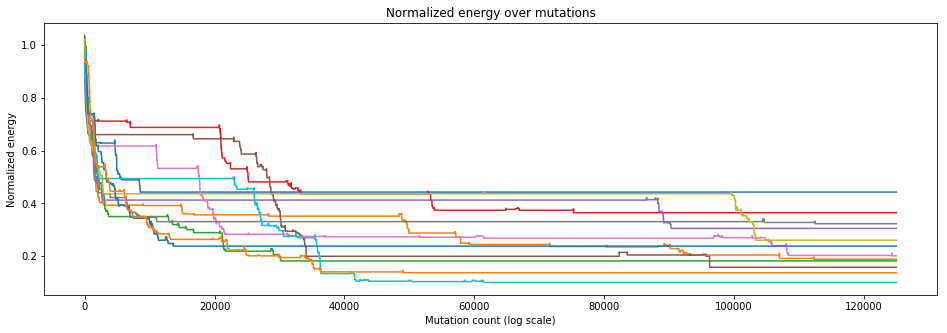

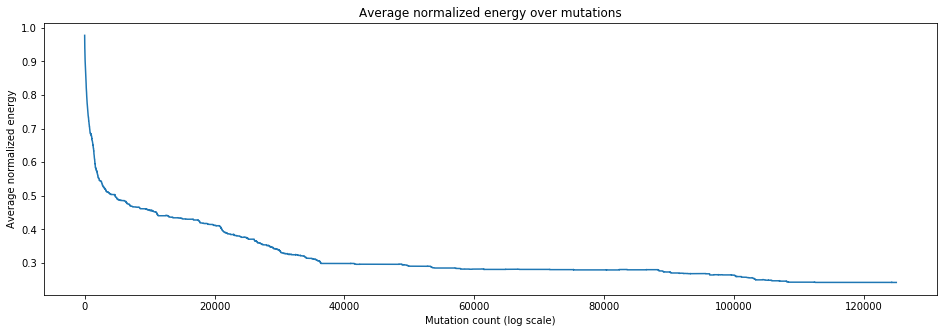

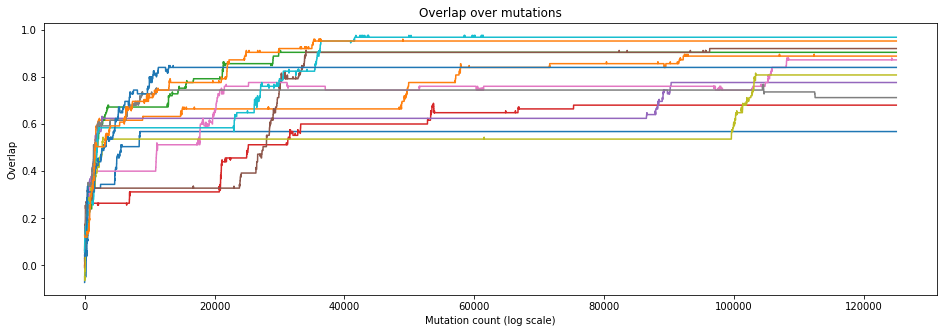

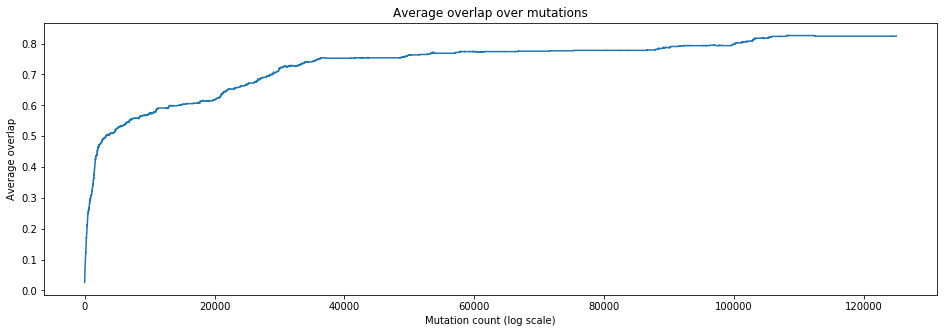

In [113]:
# PLOT
for i in range(RUN_COUNT):
    EMeasures = allEMeasures[:, i]
    plt.plot(range(0, T + 1, MEASURE_STEP), EMeasures / M)
plt.title('Normalized energy over mutations')
plt.xlabel('Mutation count (log scale)')
plt.ylabel('Normalized energy')
plt.show()

EMeasuresMean = np.mean(allEMeasures, axis=1)
EMeasuresStd = np.std(allEMeasures, axis=1)

plt.plot(range(0, T + 1, MEASURE_STEP), EMeasuresMean / M)
plt.title('Average normalized energy over mutations')
plt.xlabel('Mutation count (log scale)')
plt.ylabel('Average normalized energy')
plt.show()

for i in range(RUN_COUNT):
    overlapMeasures = allOverlapMeasures[:, i]
    plt.plot(range(0, T + 1, MEASURE_STEP), overlapMeasures)
plt.title('Overlap over mutations')
plt.xlabel('Mutation count (log scale)')
plt.ylabel('Overlap')
plt.show()


overlapMeasuresMean = np.mean(allOverlapMeasures, axis=1)
plt.plot(range(0, T + 1, MEASURE_STEP), overlapMeasuresMean)
plt.title('Average overlap over mutations')
plt.xlabel('Mutation count (log scale)')
plt.ylabel('Average overlap')
plt.show()